# Generating Abnormal 12-leads ECG

This example can be referenced by [citing the package](https://github.com/neuropsychology/NeuroKit#citation).

In [2]:
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

In [3]:
# This "decorative" cell should be hidden from the docs once this is implemented:
# https://github.com/microsoft/vscode-jupyter/issues/1182 
plt.rcParams['figure.figsize'] = [15, 5]  # Bigger images
plt.rcParams['font.size']= 14

## Normal Multi-lead ECG

We can generate a normal multi-lead ECG signal with the following code:

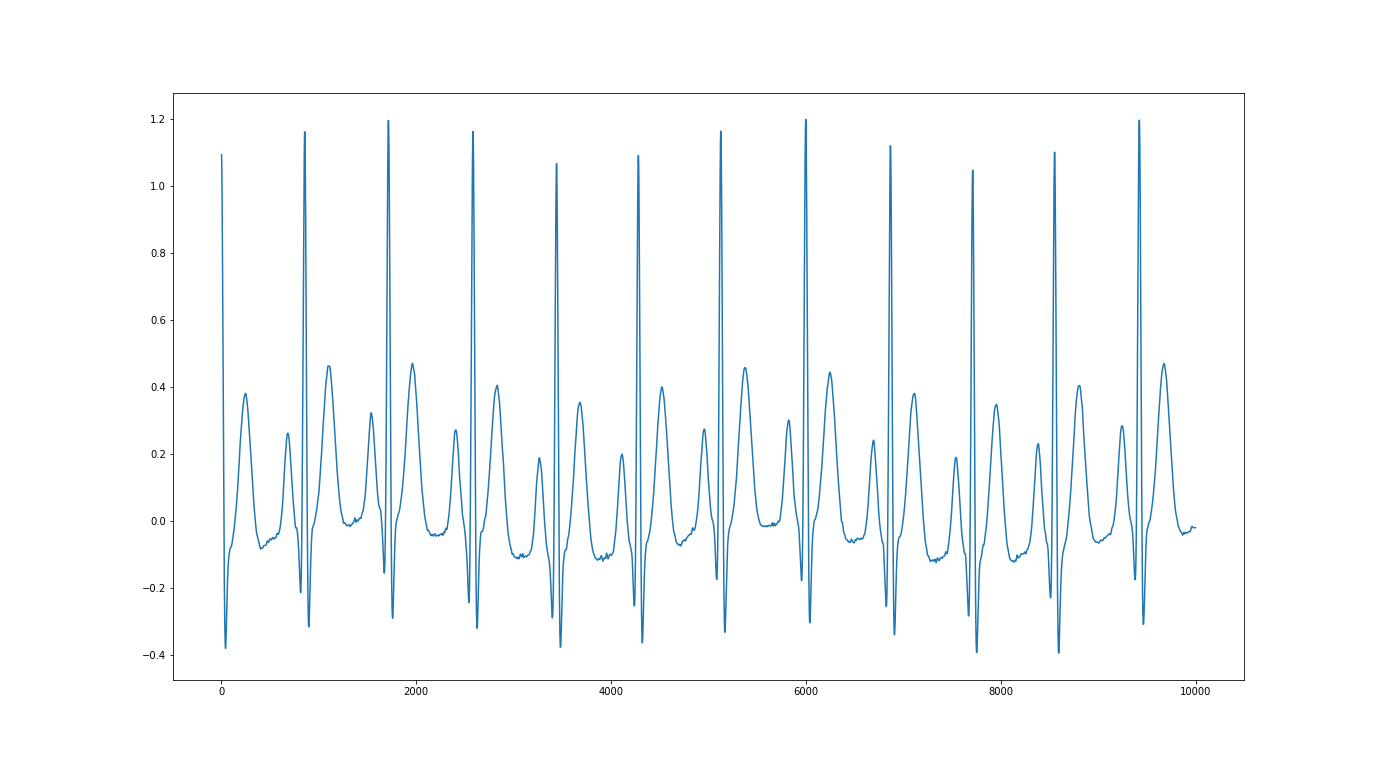

In [1]:
ecg12 = nk.ecg_simulate(duration=10, method="multileads")

# Visualize results
pd.Series(ecg12[0:10000]).plot(subplots=True);

## Abnormal Multi-lead ECG

Abnormal ECG can be generated by modifying the simulation parameters. We will draw random parameters from a distribution.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

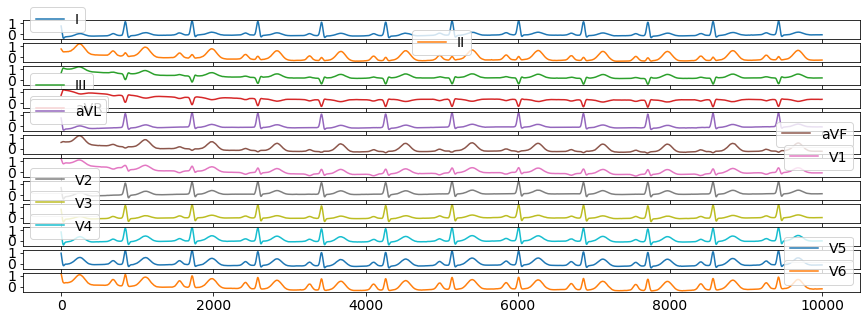

In [12]:
# Normal parameters (used by default)
# ===================================
# t, the starting position along the circle of each interval in radius
ti = np.array((-70, -15, 0, 15, 100))
# a, the amplitude of each spike
ai = np.array((1.2, -5, 30, -7.5, 0.75))
# b, the width of each spike
bi = np.array((0.25, 0.1, 0.1, 0.1, 0.4))

# Add noise
# ===============
ti = np.random.normal(ti, np.ones(5) * 3)
ai = np.random.normal(ai, np.abs(ai / 5))
bi = np.random.normal(bi, np.abs(bi / 5))

ecg12 = nk.ecg_simulate(duration=10, method="multileads", ti=ti, ai=ai, bi=bi)

# Visualize results
ecg12[0:10000].plot(subplots=True);

## Explanation


For a better understanding of the above parameters, please read the following.

![](table.png)

We can see from the above table that each interval in the 3D trajectory can be fixed by 3 parameters:

- `ti`: The starting position $\theta_i/t_i$ along the circle of each interval in radius
- `ai`: The amplitude of each spike a
- `bi`: The width of each wave b. By altering these 3 parameters we can change the shape of the 3D trajectory and thus change the waveform of the resulting ECG.

![](3D.png)

**Prebuilt Synthetic Data**
Prebuilt synthetic data can be found at the following link":
- https://drive.google.com/drive/folders/1iqyAlyHAvNWdOvjEGn8Y6C8kItsdZ_GC?usp=sharing


